# Load data

In [1]:
from sklearn import cluster
from neupy import algorithms
import seaborn as sns

import data
import plot
import evaluation
from conf import N_CLUSTERS


data_bin, words, dim = data.load_vectors("binvectors256.vec", read_first_words = 10000, sample_words=1000)

/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/peter/.pyenv/versions/env37/lib/python3.7/s

# Cluster using ART1
## Cluster visualization

Silhouette score: -0.00820022749084525


/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


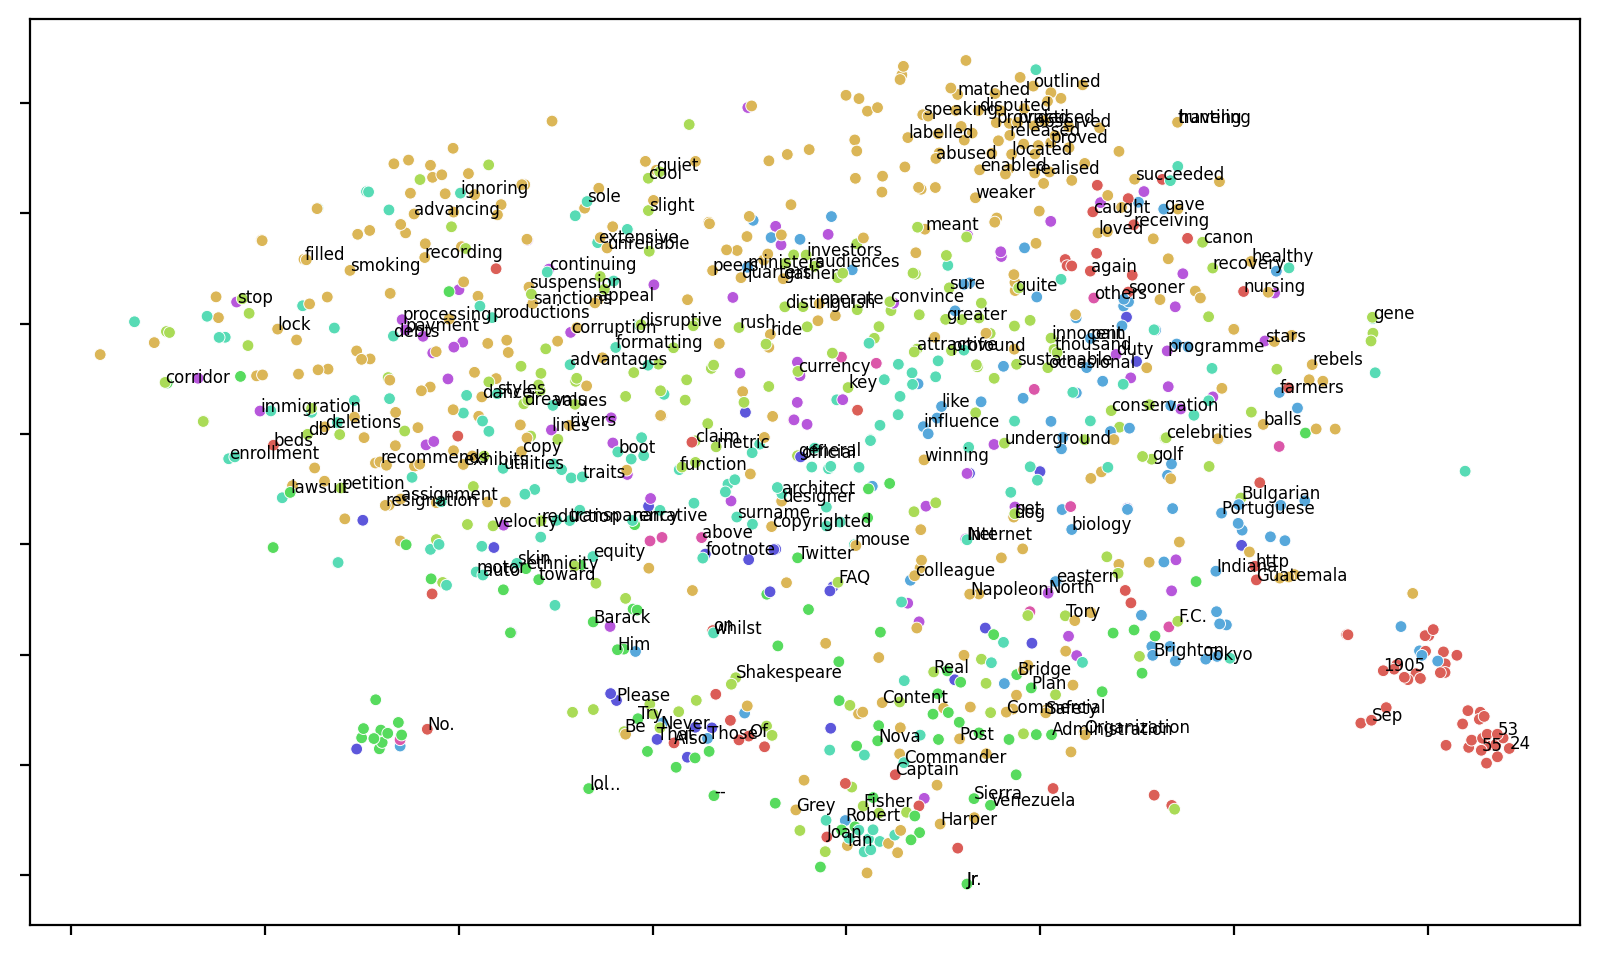

clusters,0,1,2,3,4,5,6,7,8,9
0,on,be,more,page,its,like,Wikipedia,can,into,because
1,17,used,need,--,under,4,edit,support,others,again
2,24,development,issues,t,production,later,For,never,&,2006
3,June,itself,building,\,behind,got,today,stop,New,though
4,04,provided,problems,C,alt,Russia,film,North,above,went
5,40,design,general,Friday,close,international,every,society,dust,recently
6,1996,usually,small,‘,products,energy,That,Israel,bread,died
7,32,released,national,toward,quality,European,title,numbers,publicity,http
8,Of,species,claim,officer,features,half,study,access,glory,argument
9,33,generally,sure,index.php,function,century,Please,church,vacation,An


<Figure size 2000x1200 with 0 Axes>

In [2]:
from conf import ART_VIGILANCE, ART_LEARNING_RATE


artnet = algorithms.ART1(
        step=ART_LEARNING_RATE,
        rho=ART_VIGILANCE,
        n_clusters=N_CLUSTERS,
        shuffle_data=False
    )
evaluation.report_model(artnet, data_bin, words, "ART")

## Explore parameters

In [3]:
results = evaluation.art_explore_parameters(data_bin, vigilances=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], learning_rates = None, n_clusters_settings=[5,10,20,50, 100, 200])


<AxesSubplot:xlabel='vigilance', ylabel='silhouette_score'>

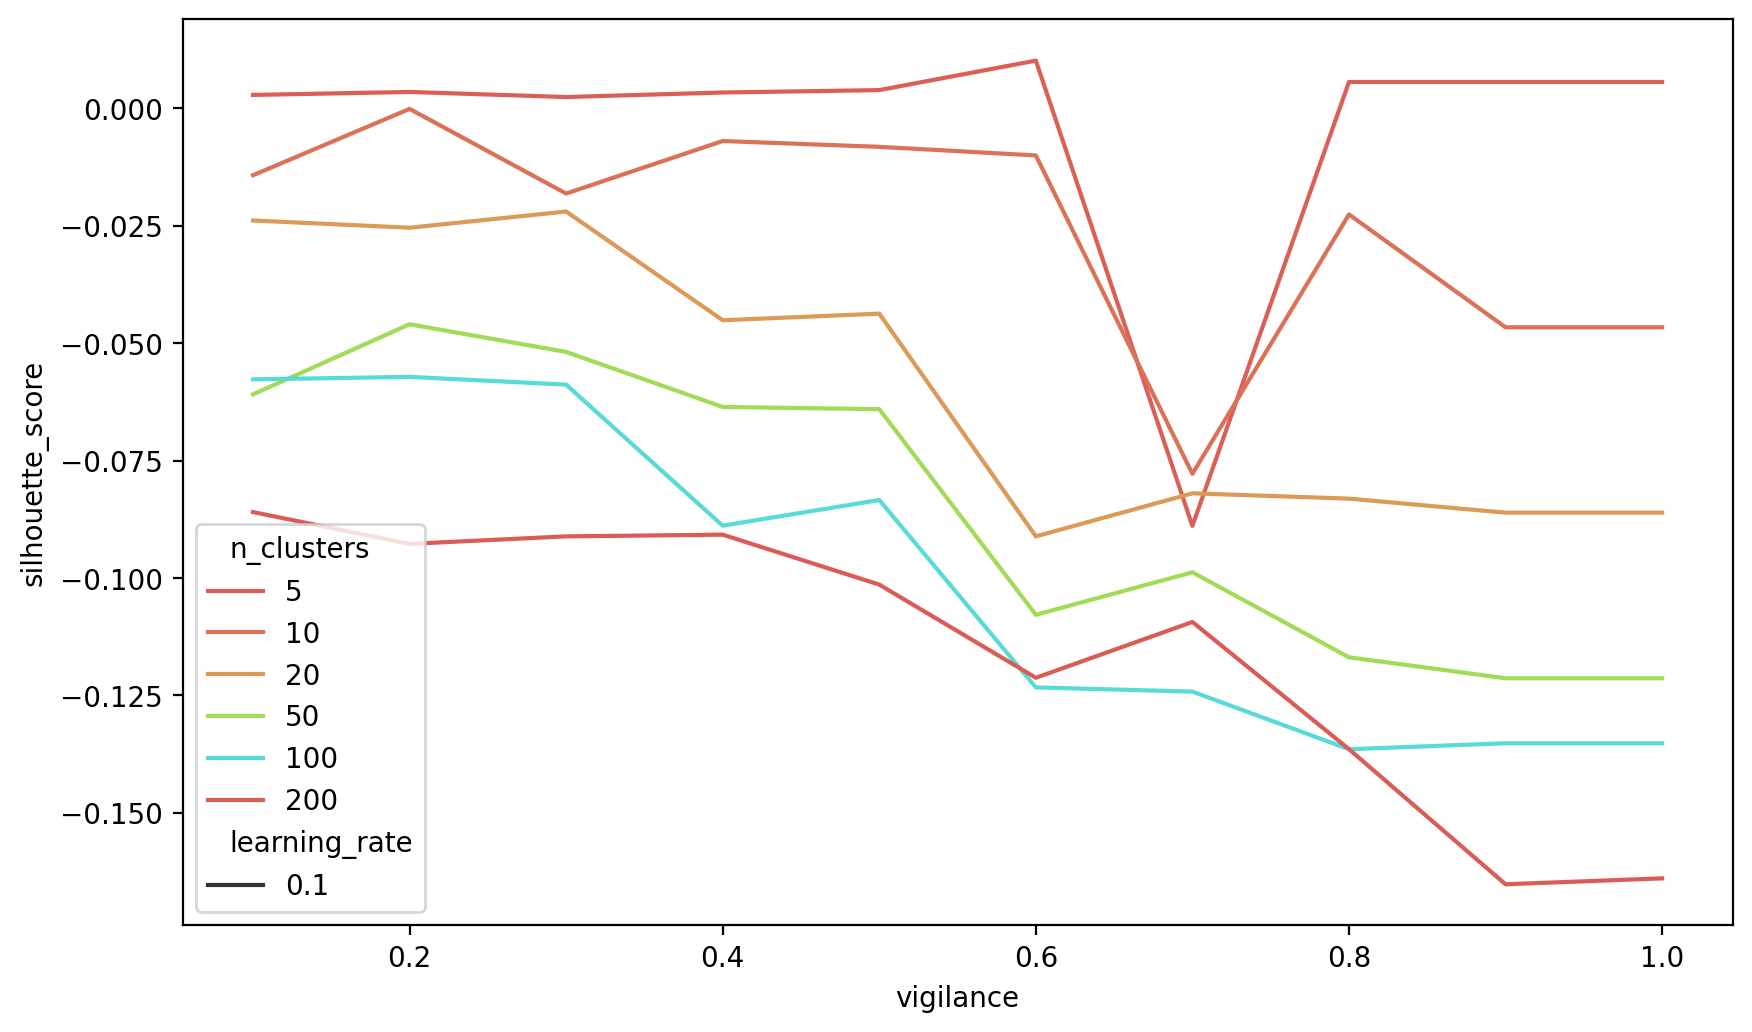

In [4]:
sns.lineplot(data=results, x="vigilance", y="silhouette_score", style="learning_rate", hue="n_clusters", palette="hls")

<AxesSubplot:xlabel='vigilance', ylabel='min_cluster_size'>

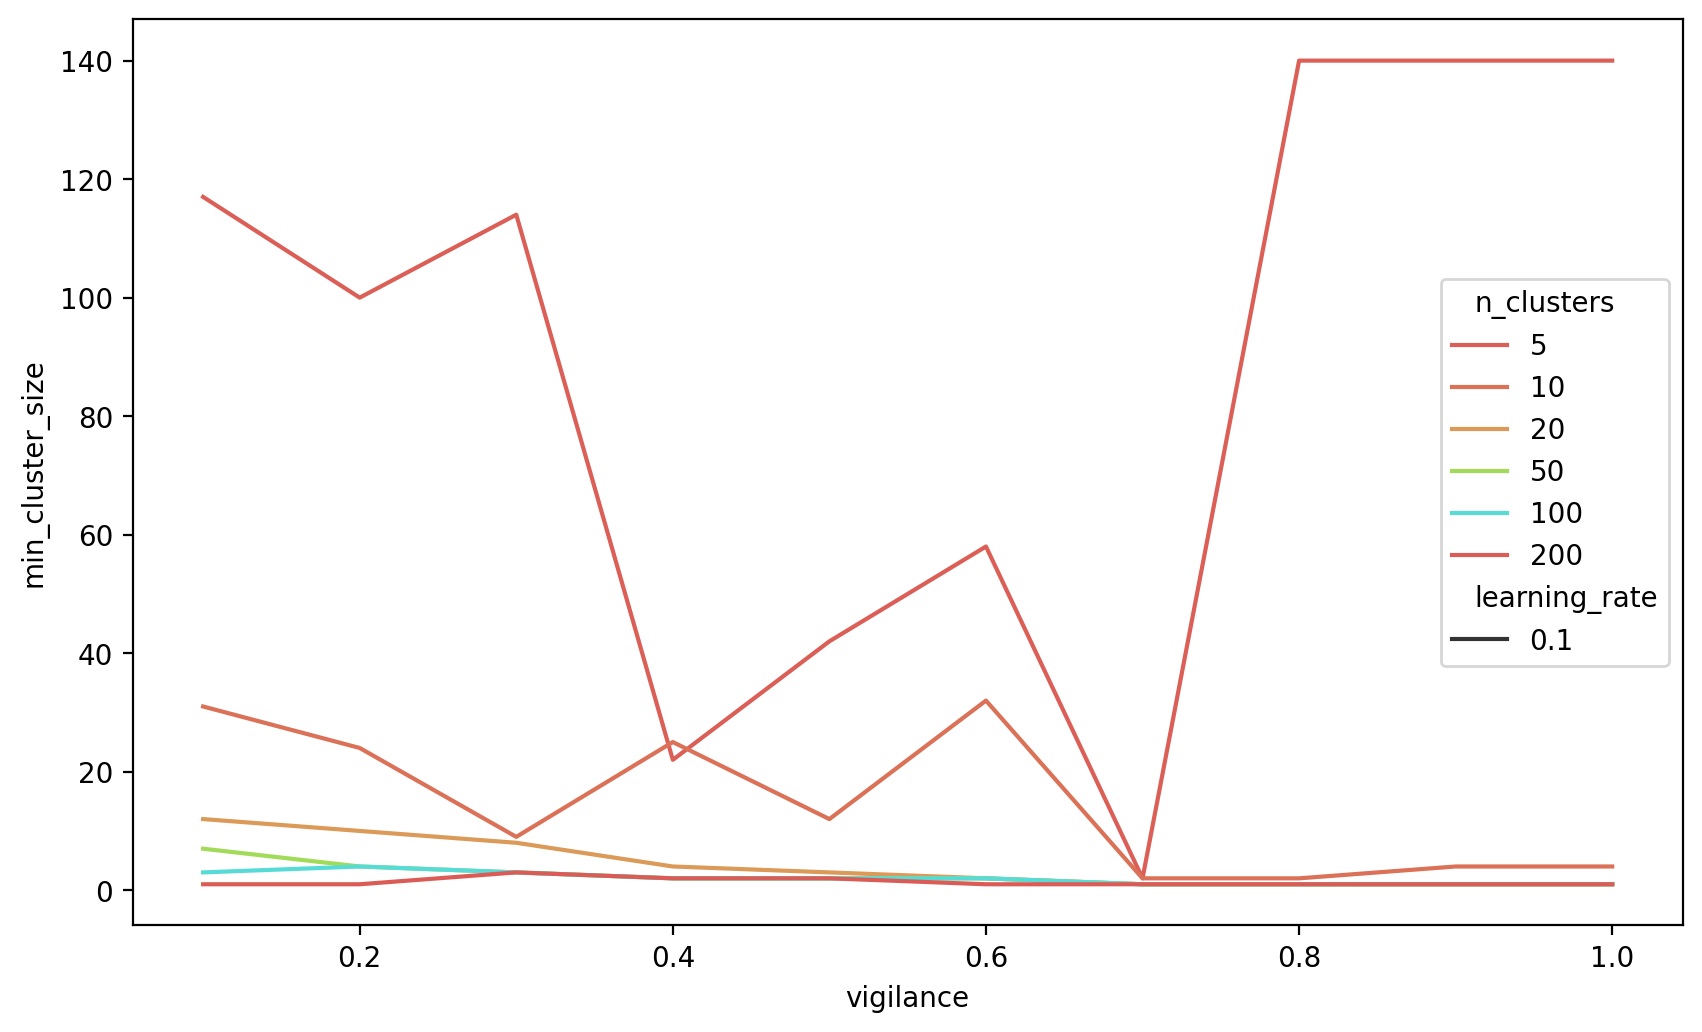

In [5]:
sns.lineplot(data=results, x="vigilance", y="min_cluster_size", style="learning_rate", hue="n_clusters", palette="hls")

# Other clustering methods

## Agglomerative clustering

Silhouette score: 0.022824774285264093


/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


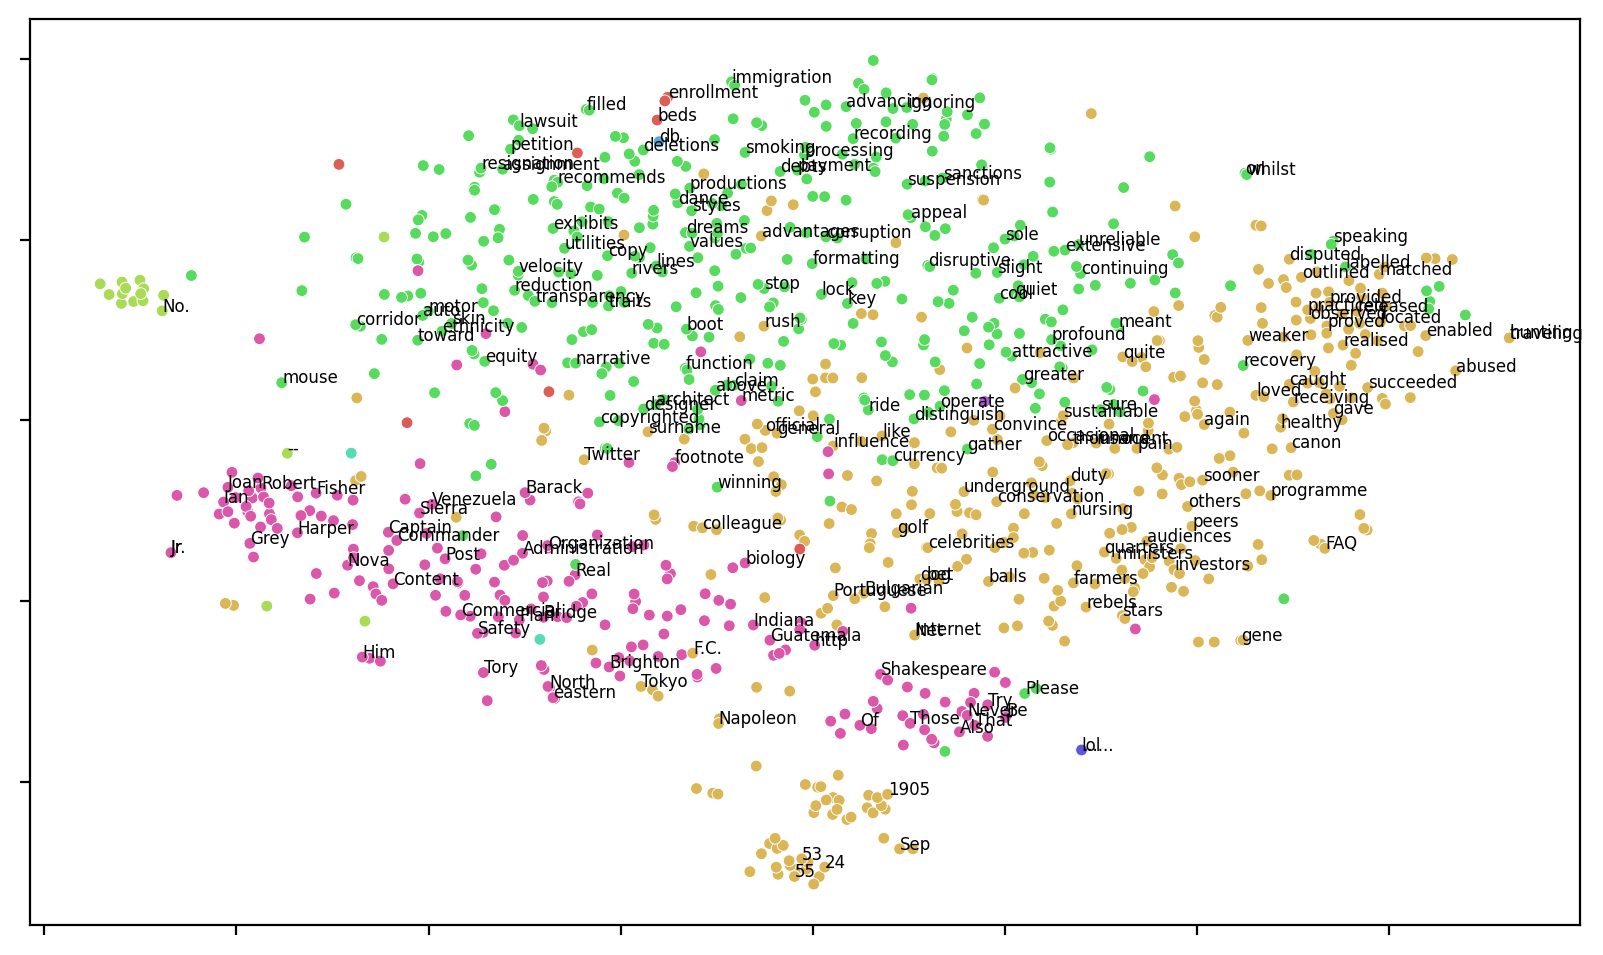

clusters,0,1,2,3,4,5,6,7,8,9
0,cap,be,--,on,St.,db,......,reactor,For,cookies
1,enrollment,page,4,more,VI,,lol,,New,shells
2,caps,like,&,its,,,,,That,
3,tuition,Wikipedia,[,into,,,,,When,
4,inches,can,t,support,,,,,England,
5,beds,because,\,above,,,,,All,
6,uniforms,under,C,film,,,,,House,
7,,edit,An,title,,,,,Hello,
8,,used,‘,issues,,,,,North,
9,,again,index.php,Please,,,,,Israel,


<Figure size 2000x1200 with 0 Axes>

In [6]:

# For binary, manhattan=hamming
agg = cluster.AgglomerativeClustering(n_clusters=N_CLUSTERS, affinity="manhattan", linkage="average")
evaluation.report_model(agg, data_bin, words, "Agglomerative clustering")

## OPTICS

Silhouette score: -0.07533134078224868


/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


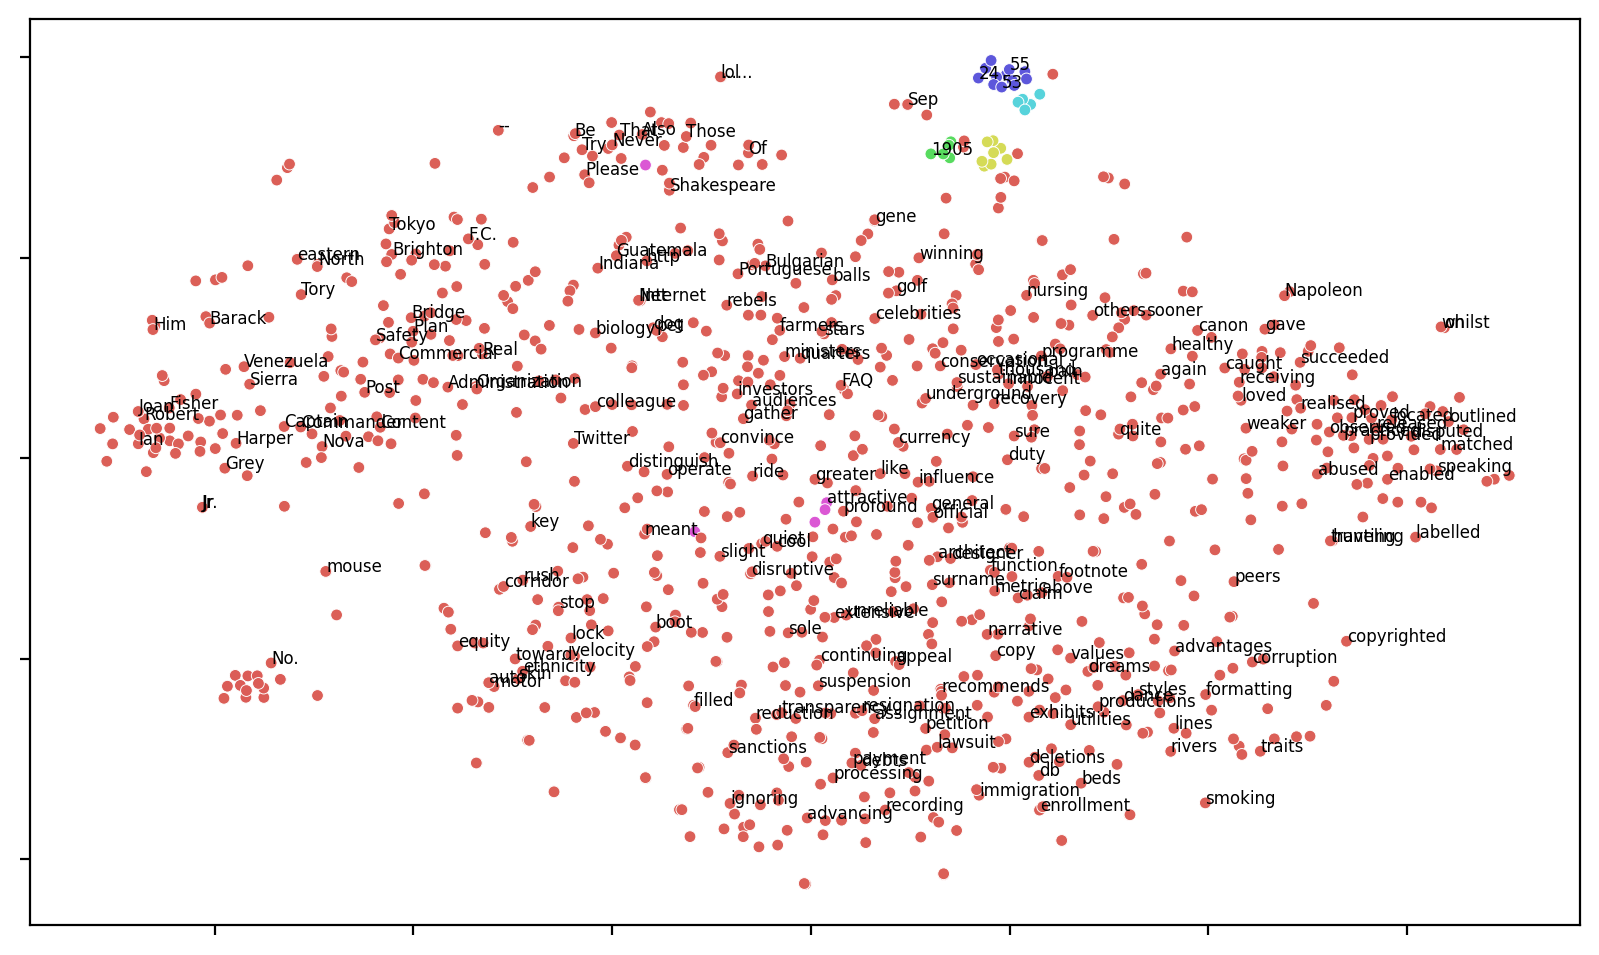

clusters,-1,0,1,2,3,4,5
0,on,1997,1930,70,17,miss,4
1,be,1996,1919,88,24,attractive,&
2,more,1993,1934,78,04,exciting,t
3,page,1980,1912,79,40,spectacular,\
4,its,1972,1905,94,32,Sure,C
5,like,1971,,,33,,‘
6,Wikipedia,1962,,,44,,y
7,can,1961,,,55,,V
8,into,,,,51,,r
9,because,,,,54,,W


<Figure size 2000x1200 with 0 Axes>

In [7]:

opt = cluster.OPTICS(metric="hamming")
evaluation.report_model(opt, data_bin, words, "OPTICS")

## Affinity propagation (distance metric correct?)

Silhouette score: 0.03801024635845286


/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


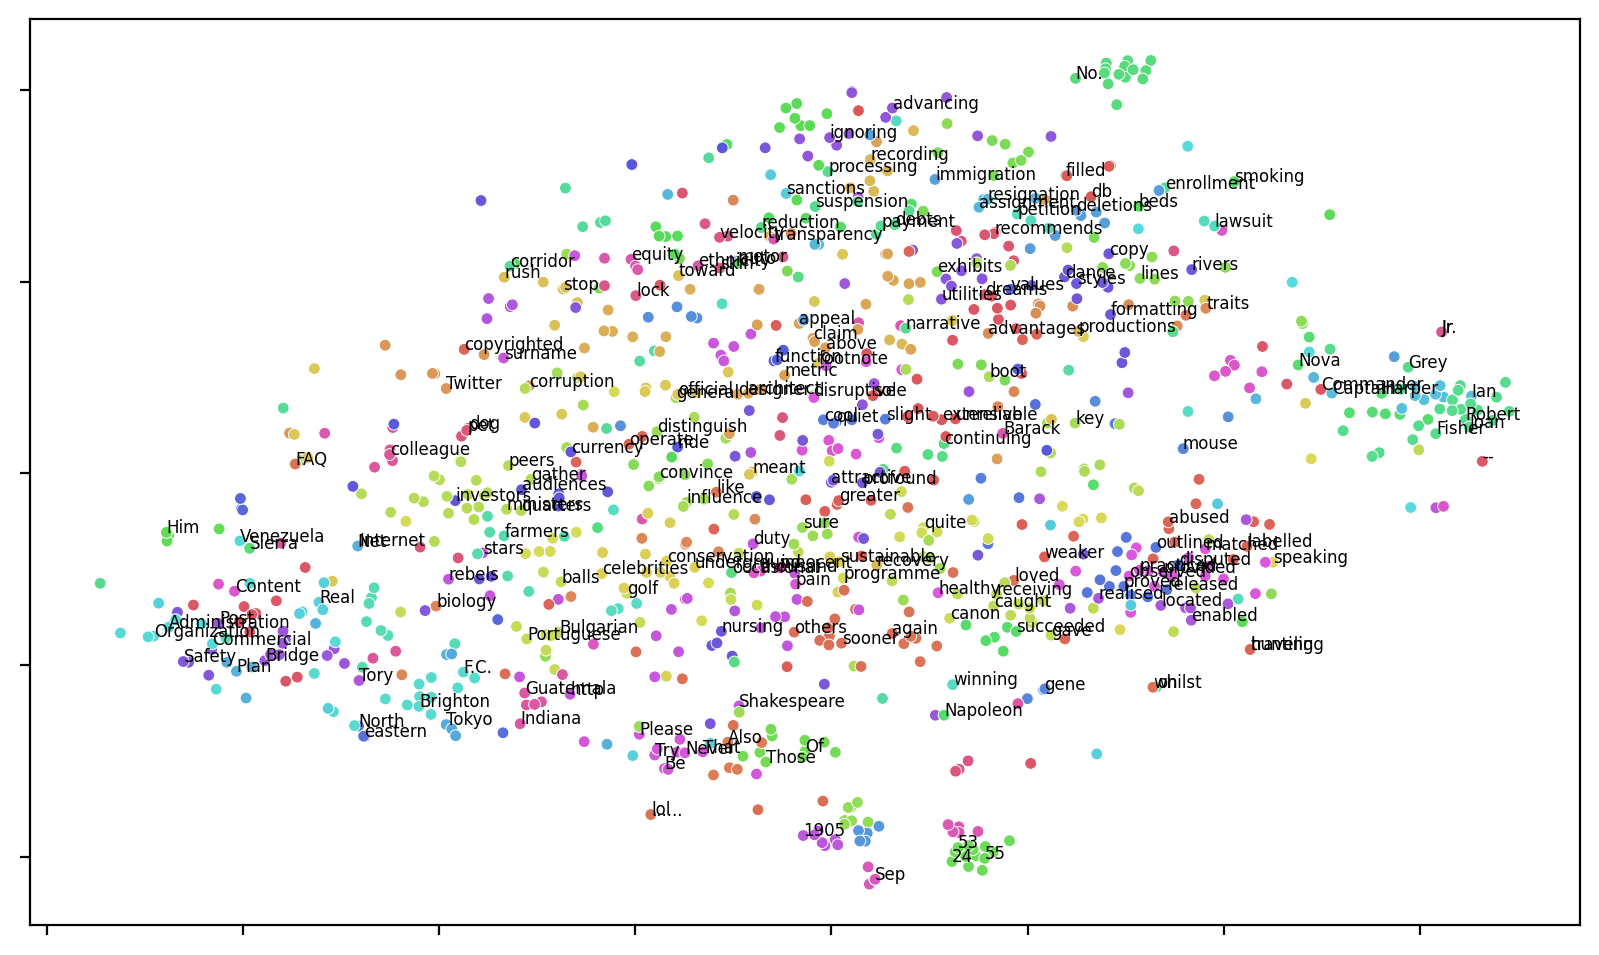

clusters,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,more,used,again,like,When,water,issues,page,above,design,...,friend,Jr,skin,fifth,species,judge,--,skills,primary,unsourced
1,certain,scored,later,because,Also,quality,problems,website,claim,products,...,Navy,Jr.,increases,13th,entire,writes,Hello,POV,scheme,db
2,greater,exercise,others,though,Later,supply,stories,Twitter,argument,construction,...,Prince,,lock,16th,animal,thinks,Friday,promise,extensive,void
3,smaller,bought,England,recently,Whether,tone,corruption,trademark,appeal,screen,...,Senator,,drag,,dog,identifies,Video,patterns,visible,unreferenced
4,younger,exchange,period,characters,Upon,drink,crimes,PDF,claiming,presentation,...,researcher,,tongue,,universe,performs,GM,theories,satellite,
5,efficient,conducted,half,however,,waters,situations,cookies,fails,grant,...,contributor,,velocity,,vacation,monitors,Mail,dreams,continuous,
6,raw,requested,century,answers,,biology,fault,webpage,glory,granted,...,colleague,,cache,,pet,recommends,Age,commitments,organizing,
7,clearer,operate,crash,whilst,,tea,advantages,,steam,designer,...,Airlines,,fiber,,,builds,Archive,desires,unreliable,
8,adequately,provisions,subsequent,apart,,Palestine,traits,,confirmation,architect,...,,,,,,,animation,ambitions,distinctive,
9,profitable,copyrighted,protocol,loved,,journalism,obstacles,,metric,counsel,...,,,,,,,Opera,,sole,


<Figure size 2000x1200 with 0 Axes>

In [8]:
aff = cluster.AffinityPropagation(random_state=None)
evaluation.report_model(aff, data_bin, words, "Affinity propagation")

## SOM (NeuPy)

/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Silhouette score: 0.05654236672750686


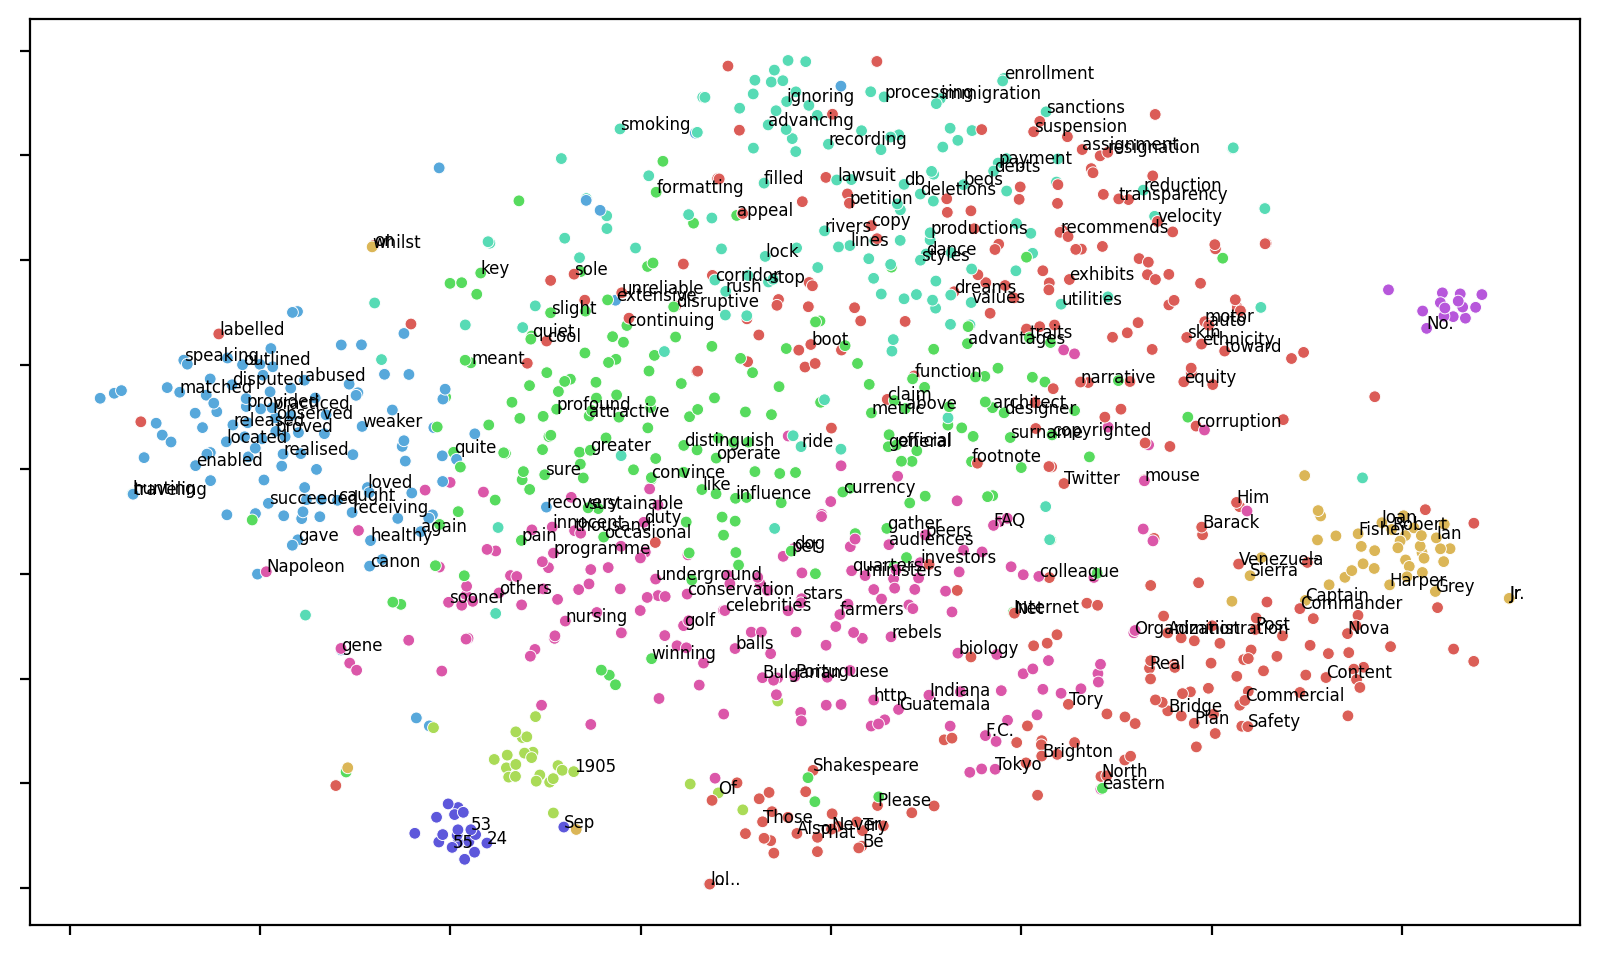

clusters,0,1,2,3,4,5,6,7,8,9
0,--,Robert,2006,more,support,be,17,4,Wikipedia,on
1,For,Jackson,June,page,issues,used,24,&,can,title
2,New,Frank,century,its,development,again,04,[,later,website
3,That,Jan,1997,like,building,though,40,t,others,claim
4,Please,whilst,1996,into,production,got,32,\,today,design
5,When,Tim,Of,because,stop,never,33,C,study,album
6,All,Captain,1993,under,lines,provided,44,‘,water,alt
7,House,Anderson,Poland,edit,construction,usually,55,y,England,products
8,Hello,Matt,1980,need,creating,released,51,V,national,quality
9,North,Alan,1972,above,contract,gave,54,No.,WP,access


<Figure size 2000x1200 with 0 Axes>

In [9]:
import numpy as np


som_neupy = algorithms.competitive.sofm.SOFM(n_inputs=dim, n_outputs=N_CLUSTERS)
evaluation.report_model(som_neupy, data_bin, words, "SOM-neupy")

## SOM (MiniSOM)

Silhouette score: 0.04941622295330724


/home/peter/.pyenv/versions/env37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


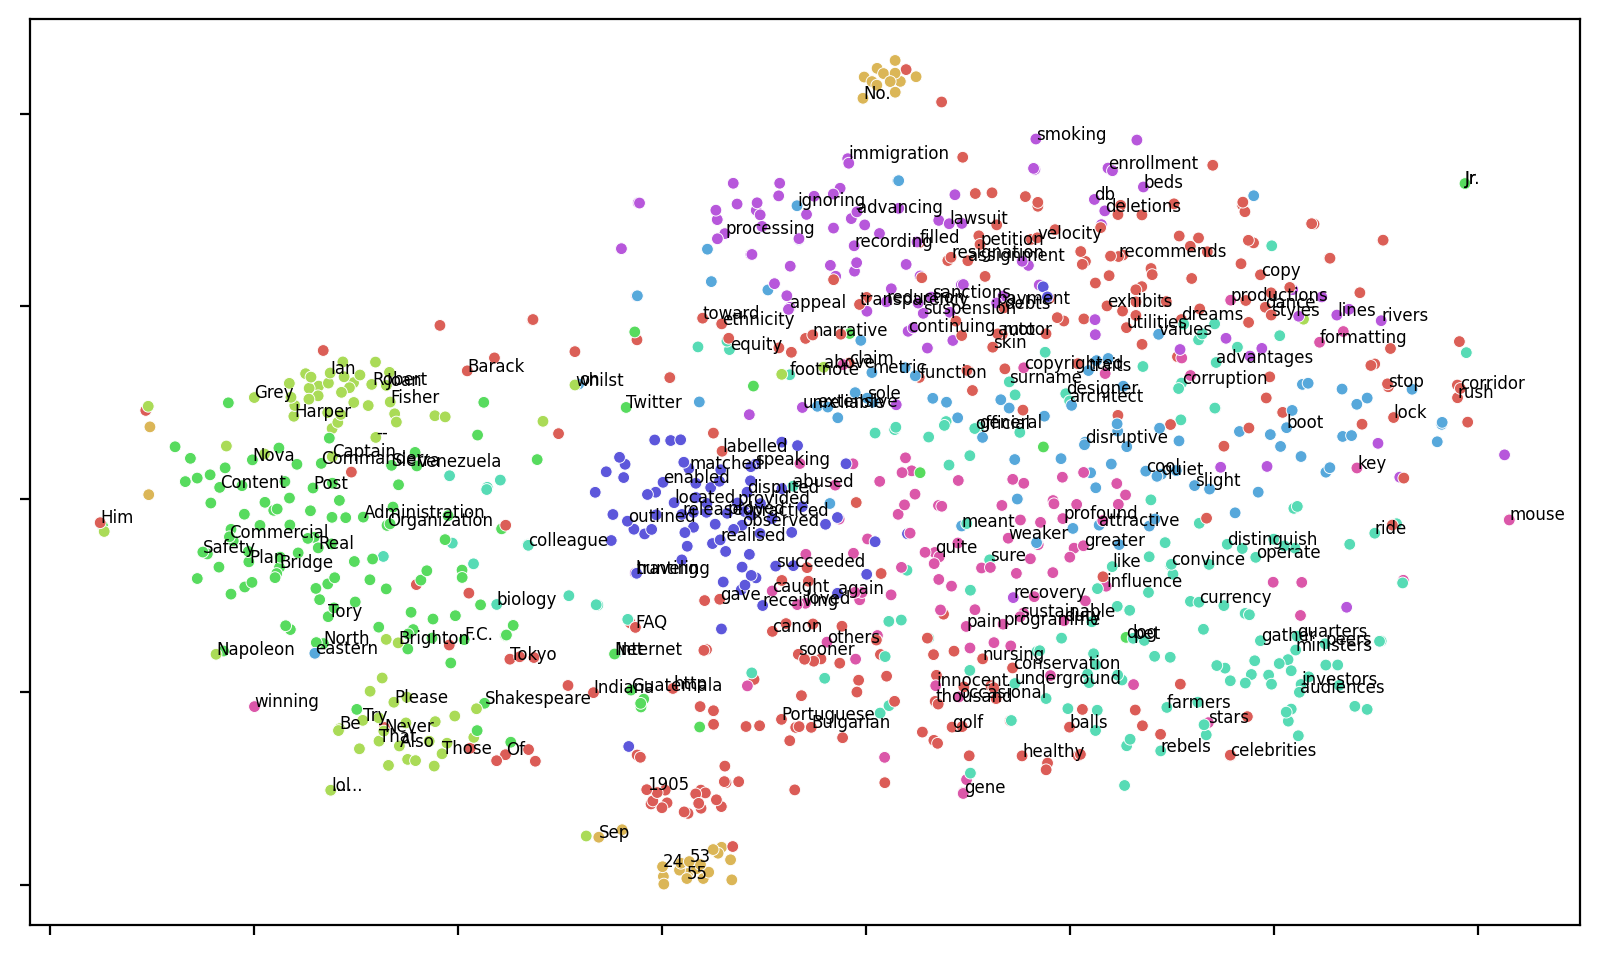

clusters,0,1,2,3,4,5,6,7,8,9
0,title,17,--,New,page,on,used,support,be,Wikipedia
1,issues,4,For,film,like,its,again,development,more,later
2,website,&,above,House,can,mean,got,building,because,2006
3,claim,24,That,North,into,behind,provided,production,under,today
4,design,[,Please,Friday,edit,close,released,products,others,every
5,t,June,When,Bank,need,features,generally,quality,though,England
6,album,04,All,Jesus,water,primary,went,lines,study,national
7,stop,\,Hello,Parliament,general,values,recently,construction,itself,period
8,alt,C,Also,St.,account,showing,brought,creating,never,Russia
9,function,40,Robert,Boston,WP,front,announced,contract,problems,international


<Figure size 2000x1200 with 0 Axes>

In [10]:
from minisom import MiniSom
som_minisom = MiniSom(1, N_CLUSTERS, dim, learning_rate=0.1, sigma=0.5)
evaluation.report_model(som_minisom, data_bin, words, "SOM-minisom", n_clusters=N_CLUSTERS)